In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
song_df = pd.read_csv('static/data/song.csv')
album_df = pd.read_csv('static/data/album.csv')
artist_df = pd.read_csv('static/data/artist.csv')

In [4]:
artist_df.head()

,artist_id,artist_name,external_url
0,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,https://api.spotify.com/v1/artists/1Xyo4u8uXC1...
1,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://api.spotify.com/v1/artists/6eUKZXaKkcv...
2,4GNC7GD6oZMSxPGyXy4MNB,Lewis Capaldi,https://api.spotify.com/v1/artists/4GNC7GD6oZM...
3,246dkjvS1zLTtiykXe5h60,Post Malone,https://api.spotify.com/v1/artists/246dkjvS1zL...
4,1zNqQNIdeOUZHb8zbZRFMX,Swae Lee,https://api.spotify.com/v1/artists/1zNqQNIdeOU...


In [5]:
song_df.head()

,song_id,song_name,duration_ms,url,popularity,song_added,album_id,artist_id,song_release,song_old
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,200040,https://open.spotify.com/track/0VjIjW4GlUZAMYd...,90,2020-03-20T04:54:59Z,4yP0hdKOZPNshxUOjY0cZj,1Xyo4u8uXC1ZmMpatF05PJ,2020-03-20 04:54:59+00:00,1474
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,233712,https://open.spotify.com/track/7qiZfU4dY1lWllz...,86,2017-06-09T00:39:52Z,3T4tUhGYeRNVUGevb0wThu,6eUKZXaKkcviH0Ku9w2n3V,2017-06-09 00:39:52+00:00,2489
2,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,182160,https://open.spotify.com/track/7qEHsqek33rTcFN...,89,2019-08-31T17:45:01Z,5658aM19fA3JVwTK6eQX70,4GNC7GD6oZMSxPGyXy4MNB,2019-08-31 17:45:01+00:00,1676
3,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,158040,https://open.spotify.com/track/3KkXRkHbMCARz0a...,83,2019-08-31T17:18:20Z,35s58BRTGAEWztPo9WqCIs,0LyfQWJT6nXafLPZqxe9Of,2019-08-31 17:18:20+00:00,1676
4,7MXVkk9YMctZqd1Srtv4MB,Starboy,230453,https://open.spotify.com/track/7MXVkk9YMctZqd1...,91,2017-06-09T00:44:54Z,2ODvWsOgouMbaA5xf0RkJe,1Xyo4u8uXC1ZmMpatF05PJ,2017-06-09 00:44:54+00:00,2489


In [6]:
album_df.columns

Index(['album_id', 'album_name', 'release_date', 'total_tracks', 'url',
       'album_old'],
      dtype='object')

In [7]:
album_df.head()

,album_id,album_name,release_date,total_tracks,url,album_old
0,4yP0hdKOZPNshxUOjY0cZj,After Hours,2020-03-20,14,https://open.spotify.com/album/4yP0hdKOZPNshxU...,1474
1,3T4tUhGYeRNVUGevb0wThu,÷ (Deluxe),2017-03-03,16,https://open.spotify.com/album/3T4tUhGYeRNVUGe...,2587
2,5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,2019-05-17,12,https://open.spotify.com/album/5658aM19fA3JVwT...,1782
3,35s58BRTGAEWztPo9WqCIs,Spider-Man: Into the Spider-Verse (Soundtrack ...,2018-12-14,13,https://open.spotify.com/album/35s58BRTGAEWztP...,1936
4,2ODvWsOgouMbaA5xf0RkJe,Starboy,2016-11-25,18,https://open.spotify.com/album/2ODvWsOgouMbaA5...,2685


In [8]:
album_df.columns

Index(['album_id', 'album_name', 'release_date', 'total_tracks', 'url',
       'album_old'],
      dtype='object')

In [9]:
df = song_df.merge(album_df, how="inner", on="album_id")

In [10]:
df = df.merge(artist_df, how="inner", on="artist_id")

In [11]:
df = df[['song_name','album_name','artist_name','duration_ms','popularity','song_old']]

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 807 entries, 0 to 1188
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_name    807 non-null    object
 1   album_name   807 non-null    object
 2   artist_name  807 non-null    object
 3   duration_ms  807 non-null    int64 
 4   popularity   807 non-null    int64 
 5   song_old     807 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 44.1+ KB


In [14]:
categorical_columns = ['song_name','album_name','artist_name']
numerical_columns = [col for col in df.columns if col not in categorical_columns]

In [15]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
df[numerical_columns] =  scaler.fit_transform(df[numerical_columns])

In [16]:
df.head()

,song_name,album_name,artist_name,duration_ms,popularity,song_old
0,Blinding Lights,After Hours,The Weeknd,0.237345,0.937500,0.382337
2,Save Your Tears,After Hours,The Weeknd,0.272719,0.906250,0.220786
4,Starboy,Starboy,The Weeknd,0.306371,0.947917,0.655627
5,The Hills,Beauty Behind The Madness,The Weeknd,0.333153,0.281250,0.824448
7,Can't Feel My Face,Beauty Behind The Madness,The Weeknd,0.267939,0.000000,0.824448


# EDA

## Univariate

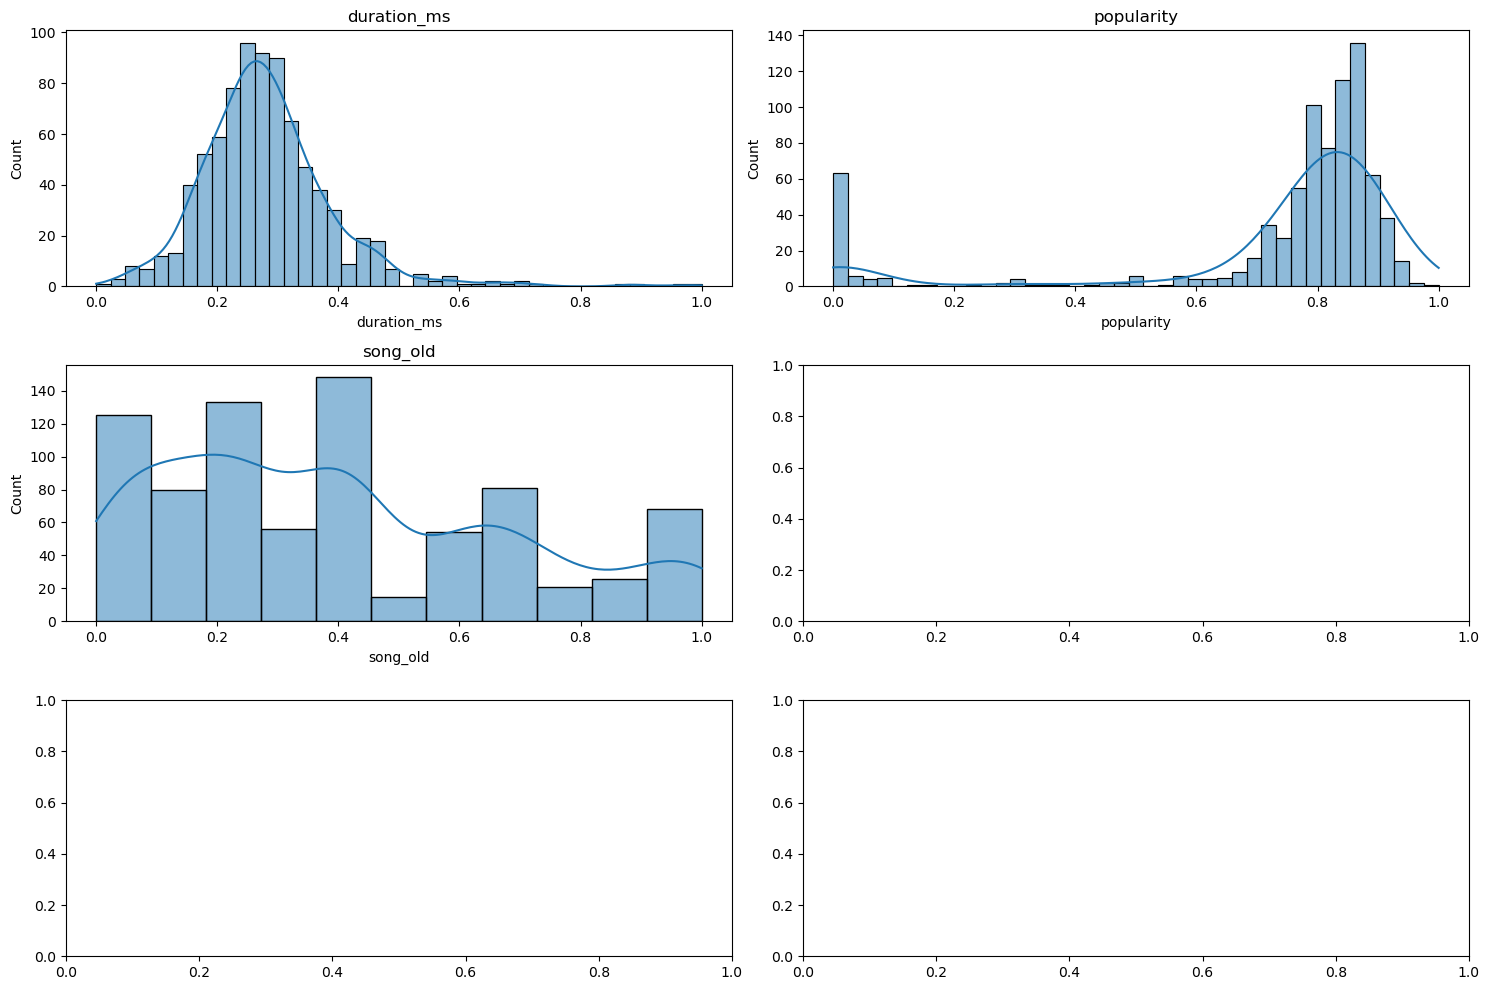

In [17]:
# Plotting subplots
num_rows = 3
num_cols = (len(numerical_columns) + len(categorical_columns) + num_rows - 1) // num_rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[column], ax=axes[row][col], kde=True)
    axes[row][col].set_title(column)

# for i, column in enumerate(categorical_columns):
#     row = (i + len(numerical_columns)) // num_cols
#     col = (i + len(numerical_columns)) % num_cols
#     sns.countplot(data=df, x=column, ax=axes[row][col])
#     axes[row][col].set_title(column)

plt.tight_layout()
plt.show()

## Bivariate

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


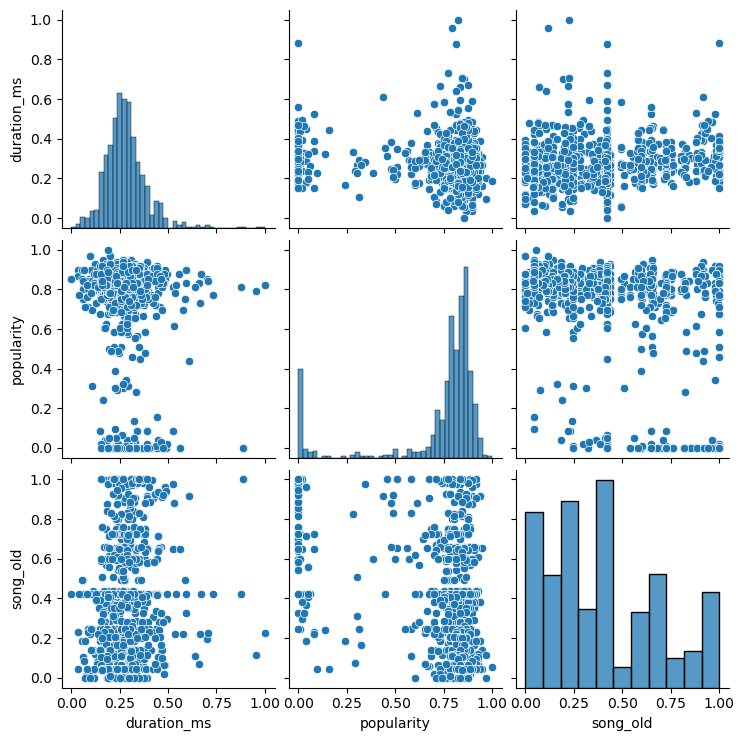

In [18]:
sns.pairplot(df[numerical_columns])

# Kmeans Clustering Model

c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

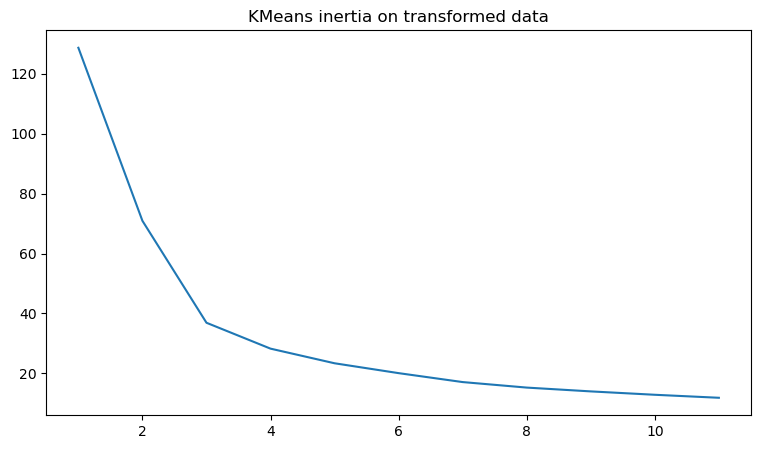

In [19]:
#Determine the number of clusters 
inertia_t = []
for i in range(1, 12):
    km = KMeans(n_clusters=i).fit(df[numerical_columns])
    inertia_t.append(km.inertia_)

#Plot to check the suggested number of clusters
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.lineplot(x=range(1,12), y=inertia_t)
plt.title('KMeans inertia on transformed data')
plt.show()

In [20]:
silhouette_scores = []

for i in range(2, 12):  # Considering clusters from 2 to 11
    km = KMeans(n_clusters=i)
    km.fit(df[numerical_columns])
    silhouette_scores.append(silhouette_score(df[numerical_columns], km.labels_))

c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

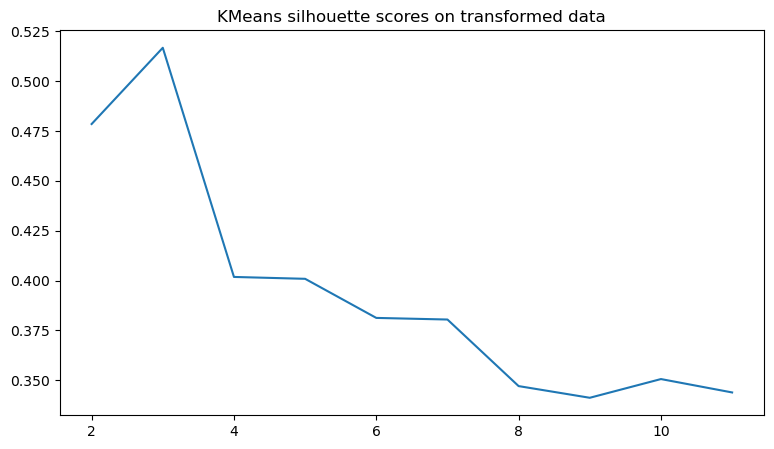

In [21]:
#Plot to check the suggested number of clusters
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.lineplot(x=range(2,12), y=silhouette_scores)
plt.title('KMeans silhouette scores on transformed data')
plt.show()

In [22]:
#Build the model
kmeans3=KMeans(n_clusters=3,n_init=10,max_iter=500)
kmeans3.fit(df[numerical_columns])

c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(max_iter=500, n_clusters=3, n_init=10)

In [23]:
#Add the clusters into the initial dataframe (centers)
df['clusters']=kmeans3.labels_ 

# take a look at the cluster center
kmeans3.cluster_centers_

array([[0.2706736 , 0.82078918, 0.22652506],
       [0.31266463, 0.04356061, 0.64731728],
       [0.29698603, 0.79177083, 0.74707862]])

In [24]:
import plotly.express as px

# Assuming df is your DataFrame with the specified columns

fig = px.scatter_3d(df, x='duration_ms', y='song_old', z='popularity', color='clusters',
                    symbol='clusters', opacity=0.7, size_max=10,
                    title='3D Scatter Plot of Clusters', color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [25]:
fig = px.scatter(df, x='song_old', y='popularity', color='clusters',
                 symbol='clusters', opacity=0.7, size_max=10,
                 title='2D Scatter Plot of Clusters', color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()


In [29]:
df.drop(columns= 'clusters')

,song_name,album_name,artist_name,duration_ms,popularity,song_old
0,Blinding Lights,After Hours,The Weeknd,0.237345,0.937500,0.382337
2,Save Your Tears,After Hours,The Weeknd,0.272719,0.906250,0.220786
4,Starboy,Starboy,The Weeknd,0.306371,0.947917,0.655627
5,The Hills,Beauty Behind The Madness,The Weeknd,0.333153,0.281250,0.824448
7,Can't Feel My Face,Beauty Behind The Madness,The Weeknd,0.267939,0.000000,0.824448
...,...,...,...,...,...,...
1184,SNAP,SNAP,Rosa Linn,0.190842,0.885417,0.045234
1185,Ella Baila Sola,DESVELADO,Eslabon Armado,0.159340,0.822917,0.045234
1186,My Girl,The Temptations Sing Smokey,The Temptations,0.157817,0.843750,0.036618
1187,PRC,GÉNESIS,Peso Pluma,0.201089,0.781250,0.007808


In [43]:
import lime

In [30]:
# Apply K-means clustering
num_clusters = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['duration_ms', 'popularity', 'song_old']])

c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [44]:
from scipy.spatial.distance import euclidean
# Define a function to find similar songs
def find_similar_songs(input_song_name):
    input_song = df[df['song_name'] == input_song_name].iloc[0]  # Get the input song from the DataFrame
    input_cluster = input_song['cluster']
    cluster_songs = df[df['cluster'] == input_cluster]
    cluster_songs = cluster_songs[cluster_songs['song_name'] != input_song_name]  # Exclude the input song

    # Calculate similarity within the cluster
    def calculate_similarity(x):
        return euclidean(x[['duration_ms', 'popularity', 'song_old']], input_song[['duration_ms', 'popularity', 'song_old']])

    cluster_songs['similarity'] = cluster_songs.apply(calculate_similarity, axis=1)
    
    # Output the top 3 similar songs within the cluster
    top_similar_songs = cluster_songs.sort_values(by='similarity').head(3)


        # Use LIME to explain similarity calculation
    explainer = lime.lime_tabular.LimeTabularExplainer(cluster_songs[['duration_ms', 'popularity', 'song_old']].values,
                                                    feature_names=['duration_ms', 'popularity', 'song_old'],
                                                    class_names=['similarity'])
    exp = explainer.explain_instance(input_song[['duration_ms', 'popularity', 'song_old']].values[0], calculate_similarity)
    exp.show_in_notebook()
    return top_similar_songs[['song_name', 'album_name', 'artist_name']]

In [45]:
# input_song_name = input("Enter a song name: ")
input_song_name = "Blinding Lights"
similar_songs = find_similar_songs(input_song_name)
print(f"Top 3 similar songs to '{input_song_name}':")
print(similar_songs)

AttributeError: module 'lime' has no attribute 'lime_tabular'

In [41]:
# Use LIME to explain similarity calculation
explainer = lime.lime_tabular.LimeTabularExplainer(cluster_songs[['duration_ms', 'popularity', 'song_old']].values,
                                                   feature_names=['duration_ms', 'popularity', 'song_old'],
                                                   class_names=['similarity'])
exp = explainer.explain_instance(input_song[['duration_ms', 'popularity', 'song_old']].values[0], calculate_similarity)
exp.show_in_notebook()

NameError: name 'lime' is not defined